Dimensioni del dataset:
Righe: 429435, Colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 

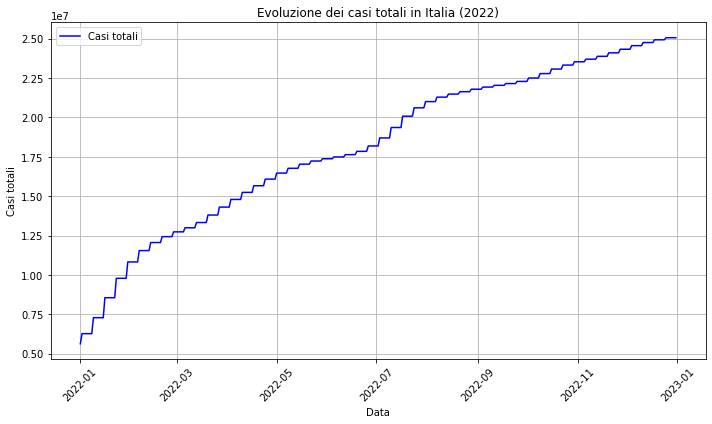

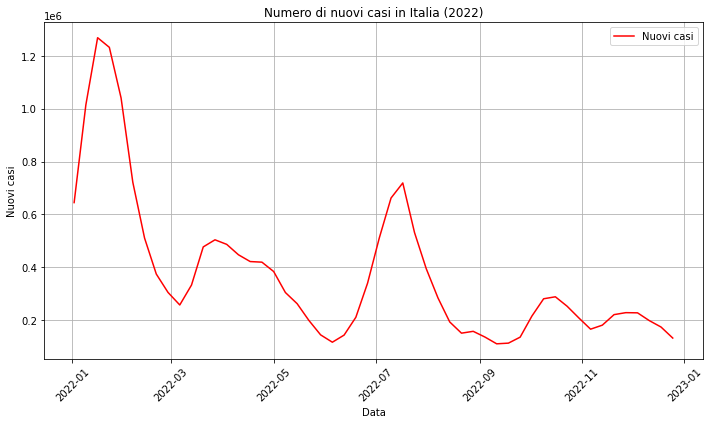

<Figure size 720x432 with 0 Axes>

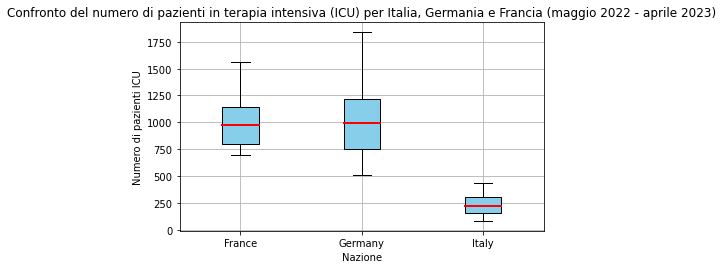


L'immagine mostra un confronto tra il numero di pazienti in terapia intensiva (ICU) in Francia, Germania e Italia 
da maggio 2022 ad aprile 2023. Francia e Germania hanno valori medi e massimi significativamente più alti rispetto 
all'Italia, indicando una maggiore pressione sulle loro terapie intensive. L'Italia, invece, mostra una distribuzione 
più contenuta, con numeri medi e massimi molto più bassi.


Tabella con i dati aggregati per ciascuna nazione nel 2023:
          Total Hosp Patients  Null Values Count
location                                        
France              1382574.0                275
Germany                   0.0                365
Italy               1175272.0                  0
Spain                354602.0                203

La gestione dei dati nulli dipende dalla loro percentuale: se bassa, si possono sostituire con media o mediana; 
se alta, servono modelli predittivi. Per i "hospital patients" nel 2023, abbiamo dati completi solo per l'Italia, 
mentre

In [1]:
# Importiamo le librerie necessarie  
import pandas as pd
import matplotlib.pyplot as plt

# Carichiamo il dataset
file_path = 'owid-covid-data.csv'  
df = pd.read_csv(file_path)

# Esercizio 1

# Verifichiamo le dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

# Verifichiamo i metadati (nomi colonne e tipi di dati)
print("\nMetadati del dataset:")
print(df.info())

# Mostriamo le prime righe del dataset 
print("\nPrime righe del dataset:")
print(df.head())

#Es.2a

# Filtriamo il dataset per righe valide nella colonna 'continent' (escludiamo valori nulli)
df_valid_continents = df[df['continent'].notnull()]

# Raggruppiamo i dati per continente (colonna 'continent') e sommiamo i nuovi casi
continent_new_cases = df_valid_continents.groupby('continent')['new_cases'].sum()

print("\nNumero totale di nuovi casi per continente:")
print(continent_new_cases)

# es 2b. Calcoliamo il numero totale di nuovi casi per tutti i continenti
total_new_cases = continent_new_cases.sum()

# Calcoliamo la percentuale di nuovi casi per ogni continente rispetto al totale
percent_new_cases = (continent_new_cases / total_new_cases) * 100

print("\nPercentuale di nuovi casi per continente rispetto al totale dei continenti:")
print(percent_new_cases)

#es 3a

# Filtriamo i dati per l'Italia (colonna 'location' uguale a 'Italy') e per l'anno 2022
df_italy = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

df_italy = df_italy.copy()  
df_italy['date'] = pd.to_datetime(df_italy['date'])

# Grafico evoluzione dei casi totali dall'inizio alla fine dell'anno
plt.figure(figsize=(10, 6))
plt.plot(df_italy['date'], df_italy['total_cases'], label='Casi totali', color='blue')
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# es 3b. Numero di nuovi casi rispetto alla data (filtriamo i nuovi casi 0)
df_italy_new_cases = df_italy[df_italy['new_cases'] > 0]

plt.figure(figsize=(10, 6))
plt.plot(df_italy_new_cases['date'], df_italy_new_cases['new_cases'], label='Nuovi casi', color='red')
plt.title('Numero di nuovi casi in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#es 4
# Filtriamo i dati per Italia, Germania e Francia
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France'])].copy()  

# Convertiamo la colonna 'date' in formato datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Selezioniamo i dati dal 1 maggio 2022 al 30 aprile 2023
df_filtered = df_filtered[(df_filtered['date'] >= '2022-05-01') & (df_filtered['date'] <= '2023-04-30')]

# Creiamo un boxplot per confrontare il numero di pazienti ICU tra le tre nazioni
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='icu_patients', by='location', grid=True, patch_artist=True, 
                   boxprops=dict(facecolor='skyblue', color='black'), 
                   whiskerprops=dict(color='black'),
                   medianprops=dict(color='red', linewidth=2))

plt.title('Confronto del numero di pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.suptitle('')  
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti ICU')
plt.tight_layout()
plt.show()

print("""
L'immagine mostra un confronto tra il numero di pazienti in terapia intensiva (ICU) in Francia, Germania e Italia 
da maggio 2022 ad aprile 2023. Francia e Germania hanno valori medi e massimi significativamente più alti rispetto 
all'Italia, indicando una maggiore pressione sulle loro terapie intensive. L'Italia, invece, mostra una distribuzione 
più contenuta, con numeri medi e massimi molto più bassi.
""")


# es.5

# Filtriamo i dati per Italia, Germania, Francia e Spagna nel 2023
df_filtered = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])].copy()  # Aggiungiamo .copy()

# Convertiamo la colonna 'date' in formato datetime con .loc per evitare il warning
df_filtered.loc[:, 'date'] = pd.to_datetime(df_filtered['date'])

# Filtriamo i dati per l'anno 2023
df_filtered_2023 = df_filtered[df_filtered['date'].dt.year == 2023]

# Sommiamo i pazienti ospitalizzati per ogni nazione
hosp_patients_sum = df_filtered_2023.groupby('location')['hosp_patients'].sum()

# Calcoliamo il numero di valori nulli per nazione nel 2023
null_values_count = df_filtered_2023.groupby('location')['hosp_patients'].apply(lambda x: x.isnull().sum())

# Creiamo un DataFrame con tutte le informazioni
summary_df = pd.DataFrame({
    'Total Hosp Patients': hosp_patients_sum,
    'Null Values Count': null_values_count,
})

print("\nTabella con i dati aggregati per ciascuna nazione nel 2023:")
print(summary_df)

print("""
La gestione dei dati nulli dipende dalla loro percentuale: se bassa, si possono sostituire con media o mediana; 
se alta, servono modelli predittivi. Per i "hospital patients" nel 2023, abbiamo dati completi solo per l'Italia, 
mentre per Francia e Spagna solo fino a luglio 2023, e la Germania non ha dati. Per la Germania, si potrebbe assumere 
una correlazione tra "icu patients" e "hospital patients" (per gli altri Paesi sembra esserci) così da provare a stimare 
gli "hospital patients". Tuttavia, nel caso in questione un altro problema è stimare la tendenza degli "icu patients" 
fino alla fine dell'anno 2023 (i dati tedeschi sono fino a luglio 2023). Bisognerebbe cercare una variabile correlata agli hosp patients e icu patients come i decessi e provare a stimare la 
tendenza degli hosp patients fino alla fine dell'anno. Per Francia e Spagna, il ragionamento è simile ma la stima potrebbe 
essere più corretta perché hanno i dati degli hosp patients fino a luglio 2023. In generale, la gestione dei dati nulli è 
complessa quando è significativo il loro impatto, quindi si potrebbe anche valutare di non toccare il dataset.
""")
